# Pandas = Python Data Analysis Library

In [1]:
# Vynucení kontroly souladu s PEP8
!pip install pycodestyle pycodestyle_magic
%load_ext pycodestyle_magic
%pycodestyle_on

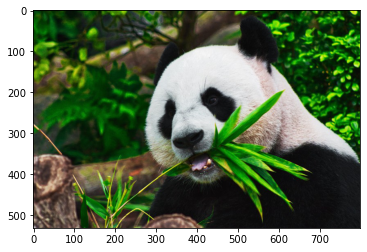

In [2]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('panda.jpg'))

Knihovna pro práci s daty v tabulkovém formátu.

In [3]:
import pandas as pd  # Konvence je importovat pandas cely pod nazvem pd

In [4]:
# Zakladni datovy typ - DataFrame (tabulka)
df = pd.DataFrame([
    [10, 1],
    [20, 2],
    [30, 3]
], columns=['First', 'Second'])

df

,First,Second
0,10,1
1,20,2
2,30,3


In [ ]:
# Jednolive sloupce tabulky jsou pristupne podle jejich nazvu
df['First']  # df.First

In [5]:
# K radkum podle indexu
df.loc[2]

First     30
Second     3
Name: 2, dtype: int64

In [6]:
# podle jmena
display(df.loc[0, 'First'])  # klasicky plati [radek, sloupec]

# podle poradi
display(df.iloc[0, 0])

# podle podminky
display(df.loc[df['First'] == 20])

# Muzeme i vyrezavat (slice)
display(df.iloc[0:2, :])

10

10

,First,Second
1,20,2


,First,Second
0,10,1
1,20,2


In [7]:
# Nazvy sloupcu jsou vlaste take indexy,
# ale vetsinou se setkame s argumentem columns pro sloupecky a index pro radky
# Z toho duvodu se casto pracuje se sloupecky a radky podobne

df.mean(axis='index')  # df.mean(axis=0)

First     20.0
Second     2.0
dtype: float64

In [10]:
df.mean(axis='columns')  # df.mean(axis=1)

0     5.5
1    11.0
2    16.5
dtype: float64

In [9]:
df.T

,0,1,2
First,10,20,30
Second,1,2,3


In [11]:
# Z vystupu vidime, ze vystup operace se sloupecky a radky je podobny - tzv. Series (druhy zakladni typ v pandas)
# Series - 1D pole, DataFrame 2D pole
series = pd.Series(['a', 'b', 'b'])
series

0    a
1    b
2    b
dtype: object

1:80: E501 line too long (113 > 79 characters)


In [13]:
# Prirazeni
df.loc[0, 'First'] = None  # jedna bunka
df['New'] = list(range(len(df)))
print(list(range(len(df))))
df

[0, 1, 2]


,First,Second,New
0,NaN,1,0
1,20.0,2,1
2,30.0,3,2


In [14]:
# Typy
# Zakladni typy - int, float, string, datatime + object
df['String'] = series
df['Object'] = [1, 'a', None]

display(df)

display(df.info())

,First,Second,New,String,Object
0,NaN,1,0,a,1
1,20.0,2,1,b,a
2,30.0,3,2,b,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   First   2 non-null      float64
 1   Second  3 non-null      int64  
 2   New     3 non-null      int64  
 3   String  3 non-null      object 
 4   Object  2 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 248.0+ bytes


None

In [15]:
# Hledani unikatnich hodnot
df['String'].unique()

array(['a', 'b'], dtype=object)

In [16]:
# Nahrazovani
df['String'].replace({'a': 'c'})

0    c
1    b
2    b
Name: String, dtype: object

In [17]:
# Prace s NaN hodnotami (docela slozita)
display(df['Object'].isna())

display(df['Object'].fillna(1))


df['First'].sum()

0    False
1    False
2     True
Name: Object, dtype: bool

0    1
1    a
2    1
Name: Object, dtype: object

50.0

In [18]:
# Statistika
df.agg(['mean', 'sum', 'count'])

,First,Second,New,String,Object
mean,25.0,2.0,1.0,NaN,NaN
sum,50.0,6.0,3.0,abb,NaN
count,2.0,3.0,3.0,3,2.0


In [ ]:
# nebo postupne
df.mean()
df.sum()

In [19]:
# nebo vse najednou
df.describe()

,First,Second,New
count,2.000000,3.0,3.0
mean,25.000000,2.0,1.0
std,7.071068,1.0,1.0
min,20.000000,1.0,0.0
25%,22.500000,1.5,0.5
50%,25.000000,2.0,1.0
75%,27.500000,2.5,1.5
max,30.000000,3.0,2.0


In [ ]:
# vizualizace

df.plot('New', 'Second', marker='o')

.. A spousta dalsich veci.

Jako v zaklanim pythonu plati pravidlo. Kdyz neco chci udelat, zkusim Google jestli to uz neni nahodnou implementovane.